## Exploring the data

In [1]:
# In this phase I don't find it important to include more then the basic packages. I will import them later in the notebooks if they are deemed necessary

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:
# Loading the dataset as "df" for now

df = pd.read_csv("data\\rideshare_kaggle.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [3]:
# I seem to have missing values only in the price column. Let's check if I will impute them or drop them completely. 

rows_missing_prices = df[df['price'].isna()]

print(rows_missing_prices)

# On first sight it looks like only columns with name "Taxi" are missing. Let's check the values for each name taxi

rows_taxi_price = df[df['name'] == "Taxi"]['price']
print(rows_taxi_price)


                                          id     timestamp  hour  day  month  \
18      fa5fb705-03a0-4eb9-82d9-7fe80872f754  1.543674e+09    14    1     12   
31      eee70d94-6706-4b95-a8ce-0e34f0fa8f37  1.543795e+09    23    2     12   
40      7f47ff53-7cf2-4a6a-8049-83c90e042593  1.543524e+09    20   29     11   
60      43abdbe4-ab9e-4f39-afdc-31cfa375dc25  1.544732e+09    20   13     12   
69      80db1c49-9d51-4575-a4f4-1ec23b4d3e31  1.543583e+09    13   30     11   
...                                      ...           ...   ...  ...    ...   
693025  70ad9983-92dd-4cdf-af16-732e7e9ee9d0  1.544887e+09    15   15     12   
693047  84e05ef0-781a-4bd5-a593-bbbf659d4ba0  1.543456e+09     1   29     11   
693049  885ef635-299e-45cf-8052-c45a39e9822a  1.543456e+09     1   29     11   
693060  50a7b6be-ed2a-4a11-8d36-73bd977ad66a  1.543728e+09     5    2     12   
693068  64d451d0-639f-47a4-9b7c-6fd92fbd264f  1.543708e+09    23    1     12   

                   datetime          ti

In [4]:
# Every Taxi ride has price as a missing value. I will drop those rows.

df = df.dropna(subset=['price'])

In [5]:
# for now I will be using a subset without the weather data, so I will make two different dataframes 

df_weather = df[['temperature', 'apparentTemperature', 'precipIntensity', 'precipProbability', 'humidity', 'windSpeed', 'windGust', 'windGustTime', 'visibility', 'temperatureHigh', 'temperatureHighTime', 'temperatureLow', 'temperatureLowTime', 'apparentTemperatureHigh', 'apparentTemperatureHighTime', 'apparentTemperatureLow', 'apparentTemperatureLowTime', 'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase', 'precipIntensityMax', 'uvIndexTime', 'temperatureMin', 'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime', 'apparentTemperatureMin', 'apparentTemperatureMinTime', 'apparentTemperatureMax', 'apparentTemperatureMaxTime', 'short_summary', 'long_summary', 'icon']]

df_no_weather = df.drop(columns=df_weather.columns)

In [8]:
df_weather.head(5)

,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,...,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,short_summary,long_summary,icon
0,42.34,37.12,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,...,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000,Mostly Cloudy,Rain throughout the day.,partly-cloudy-night
1,43.58,37.35,0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,...,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600,Rain,"Rain until morning, starting again in the eve...",rain
2,38.33,32.93,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,...,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000,Clear,Light rain in the morning.,clear-night
3,34.38,29.63,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,...,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800,Clear,Partly cloudy throughout the day.,clear-night
4,37.44,30.88,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,...,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800,Partly Cloudy,Mostly cloudy throughout the day.,partly-cloudy-night


In [9]:
df_no_weather = df_no_weather.drop(columns=['id', 'timestamp'], axis=1)

KeyError: "['id', 'timestamp'] not found in axis"

In [10]:
df_no_weather.head(5)

,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude
0,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033
1,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033
2,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033
3,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033
4,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033


In [11]:
# Splitting up the no weather data into numerical and categorical data

df_no_weather_num = df_no_weather.select_dtypes(include=['float64', 'int64'])
df_no_weather_cat = df_no_weather.select_dtypes(include=['object'])

In [12]:
display(df_no_weather_num.head(20))

,hour,day,month,price,distance,surge_multiplier,latitude,longitude
0,9,16,12,5.0,0.44,1.0,42.2148,-71.0330
1,2,27,11,11.0,0.44,1.0,42.2148,-71.0330
2,1,28,11,7.0,0.44,1.0,42.2148,-71.0330
3,4,30,11,26.0,0.44,1.0,42.2148,-71.0330
4,3,29,11,9.0,0.44,1.0,42.2148,-71.0330
5,18,17,12,16.5,0.44,1.0,42.2148,-71.0330
6,5,26,11,10.5,1.08,1.0,42.3503,-71.0810
7,19,2,12,16.5,1.08,1.0,42.3503,-71.0810
8,6,3,12,3.0,1.08,1.0,42.3503,-71.0810
9,10,27,11,27.5,1.08,1.0,42.3503,-71.0810


In [13]:
display(df_no_weather_cat)

,datetime,timezone,source,destination,cab_type,product_id,name
0,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared
1,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux
2,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft
3,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL
4,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL
...,...,...,...,...,...,...,...
693065,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV
693066,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL
693067,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX
693069,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV


In [14]:
# problem with datetime, will simplify it

df_no_weather_cat["datetime"] = pd.to_datetime(df_no_weather_cat["datetime"])

df_no_weather_cat["year"] = df_no_weather_cat["datetime"].dt.year
df_no_weather_cat["month"] = df_no_weather_cat["datetime"].dt.month
df_no_weather_cat["day_of_week"] = df_no_weather_cat["datetime"].dt.weekday

df_no_weather_cat = df_no_weather_cat.drop(columns=["datetime"])

display(df_no_weather_cat.head(20))


,timezone,source,destination,cab_type,product_id,name,year,month,day_of_week
0,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,2018,12,6
1,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,2018,11,1
2,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,2018,11,2
3,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,2018,11,4
4,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,2018,11,3
5,America/New_York,Haymarket Square,North Station,Lyft,lyft_lux,Lux Black,2018,12,0
6,America/New_York,Back Bay,Northeastern University,Lyft,lyft_plus,Lyft XL,2018,11,0
7,America/New_York,Back Bay,Northeastern University,Lyft,lyft_lux,Lux Black,2018,12,6
8,America/New_York,Back Bay,Northeastern University,Lyft,lyft_line,Shared,2018,12,0
9,America/New_York,Back Bay,Northeastern University,Lyft,lyft_luxsuv,Lux Black XL,2018,11,1


In [15]:
# One-hot encoding the categorical data
df_no_weather_cat_encoded = pd.get_dummies(df_no_weather_cat, drop_first=False)


In [16]:
df_no_weather_num = df_no_weather_num.drop(columns=["day", "month"], axis=1)

In [17]:
df_no_weather_processed = pd.concat([df_no_weather_num, df_no_weather_cat_encoded], axis=1)

df_no_weather_processed = df_no_weather_processed.astype({col: 'int' for col in df_no_weather_processed.select_dtypes(include=['bool']).columns})

display(df_no_weather_processed.head())


,hour,price,distance,surge_multiplier,latitude,longitude,year,month,day_of_week,timezone_America/New_York,...,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,9,5.0,0.44,1.0,42.2148,-71.033,2018,12,6,1,...,0,0,0,0,0,1,0,0,0,0
1,2,11.0,0.44,1.0,42.2148,-71.033,2018,11,1,1,...,1,0,0,0,0,0,0,0,0,0
2,1,7.0,0.44,1.0,42.2148,-71.033,2018,11,2,1,...,0,0,0,1,0,0,0,0,0,0
3,4,26.0,0.44,1.0,42.2148,-71.033,2018,11,4,1,...,0,0,1,0,0,0,0,0,0,0
4,3,9.0,0.44,1.0,42.2148,-71.033,2018,11,3,1,...,0,0,0,0,1,0,0,0,0,0


In [18]:
# let's check the correlation matrix for both now

corr_matrix = df_no_weather_processed.corr(numeric_only=True)

corr_matrix['price'].sort_values(ascending=False)

price                                              1.000000
product_id_lyft_luxsuv                             0.500057
name_Lux Black XL                                  0.500057
name_Black SUV                                     0.453096
product_id_6d318bcc-22a3-4af6-bddd-b409bfce1546    0.453096
distance                                           0.345061
surge_multiplier                                   0.240458
product_id_lyft_lux                                0.206544
name_Lux Black                                     0.206544
name_Black                                         0.131185
product_id_6c84fd89-3f11-4782-9b50-97c468b19529    0.131185
cab_type_Lyft                                      0.083385
destination_Boston University                      0.077515
source_Boston University                           0.074634
source_Fenway                                      0.059317
source_Financial District                          0.053468
destination_Fenway                      

In [19]:
# # Filter de correlaties met 'price' boven een absolute waarde van 0.05
# high_corr_features = corr_matrix['price'].abs() > 0.05

# # Selecteer alleen de kolommen die voldoen aan de drempel
# selected_columns = high_corr_features[high_corr_features].index

# # Behoud de geselecteerde kolommen in de dataset
# df_filtered = df_no_weather_processed[selected_columns]

# # Controleer de overgebleven kolommen
# print(selected_columns)


Index(['price', 'distance', 'surge_multiplier', 'source_Boston University',
       'source_Fenway', 'source_Financial District', 'source_Haymarket Square',
       'destination_Boston University', 'destination_Fenway',
       'destination_Haymarket Square', 'destination_South Station',
       'cab_type_Lyft', 'cab_type_Uber',
       'product_id_55c66225-fbe7-4fd5-9072-eab1ece5e23e',
       'product_id_6c84fd89-3f11-4782-9b50-97c468b19529',
       'product_id_6d318bcc-22a3-4af6-bddd-b409bfce1546',
       'product_id_997acbb5-e102-41e1-b155-9df7de0a73f2',
       'product_id_9a0e7b09-b92b-4c41-9779-2ad22b4d779d', 'product_id_lyft',
       'product_id_lyft_line', 'product_id_lyft_lux', 'product_id_lyft_luxsuv',
       'name_Black', 'name_Black SUV', 'name_Lux Black', 'name_Lux Black XL',
       'name_Lyft', 'name_Shared', 'name_UberPool', 'name_UberX', 'name_WAV'],
      dtype='object')


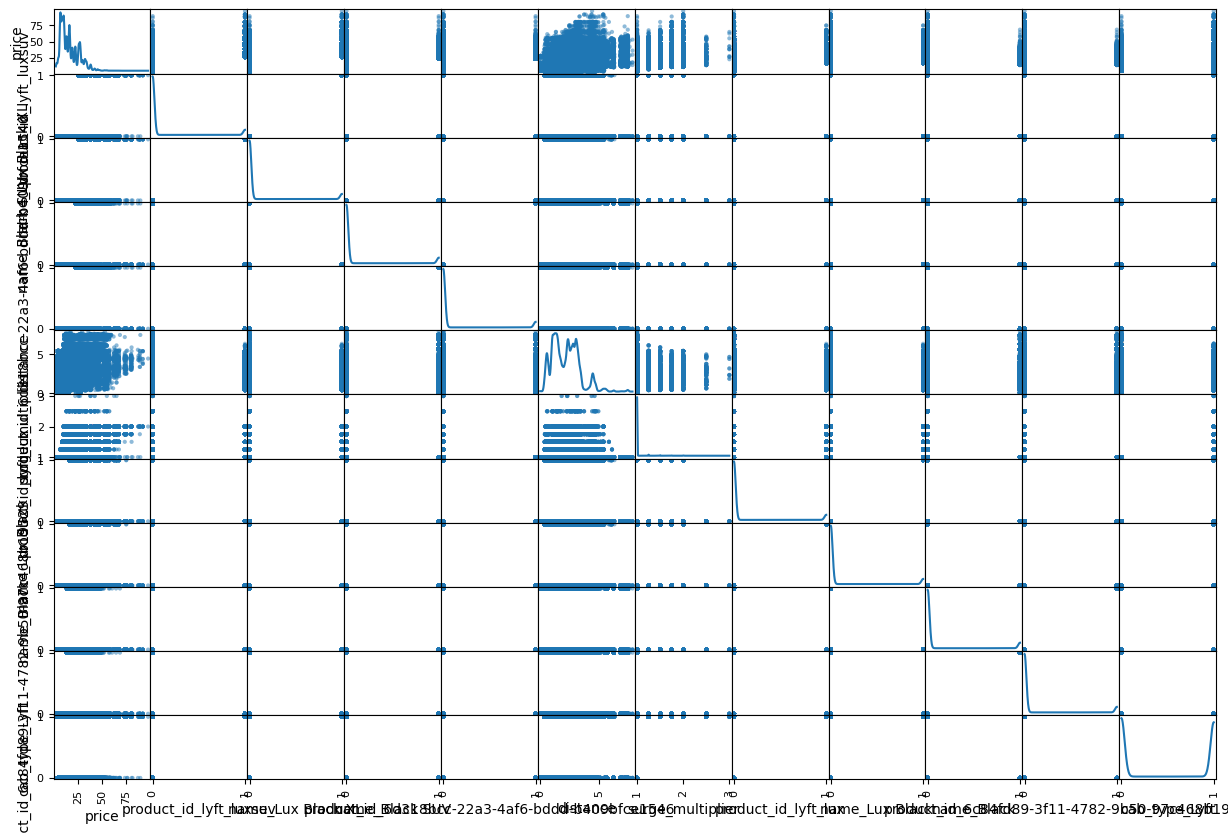

In [21]:
from pandas.plotting import scatter_matrix

# Specifieke attributen die je wilt gebruiken
attributes = [
    'price',
    'product_id_lyft_luxsuv',
    'name_Lux Black XL',
    'name_Black SUV',
    'product_id_6d318bcc-22a3-4af6-bddd-b409bfce1546',
    'distance',
    'surge_multiplier',
    'product_id_lyft_lux',
    'name_Lux Black',
    'name_Black',
    'product_id_6c84fd89-3f11-4782-9b50-97c468b19529',
    'cab_type_Lyft'
]

# Scatter matrix plot
scatter_matrix(df_no_weather_processed[attributes], figsize=(15, 10), diagonal='kde')
plt.show()


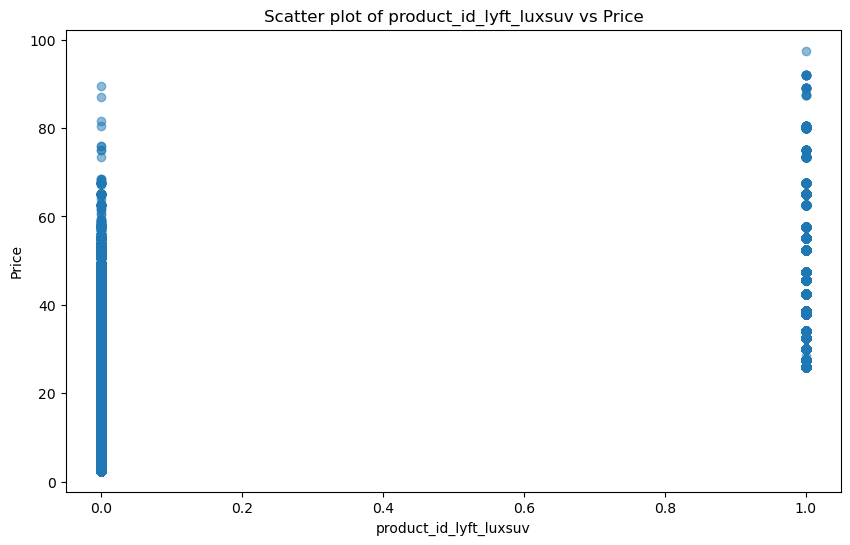

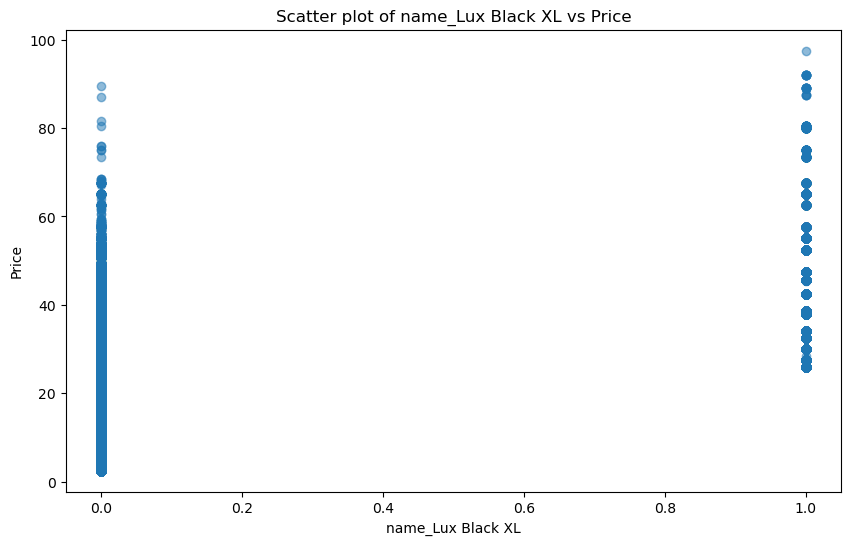

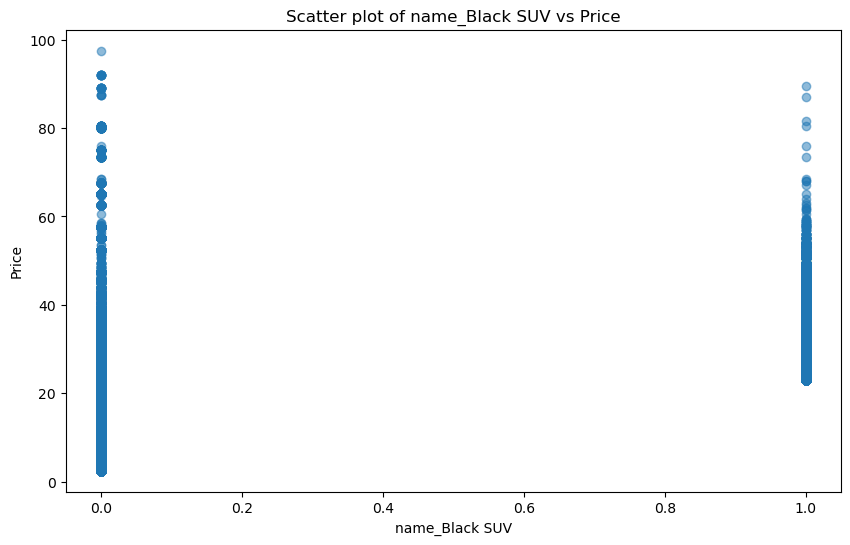

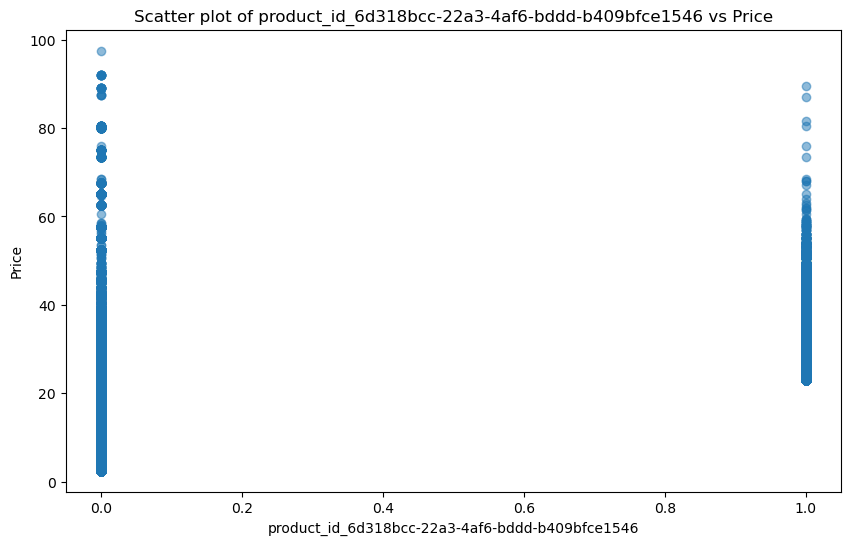

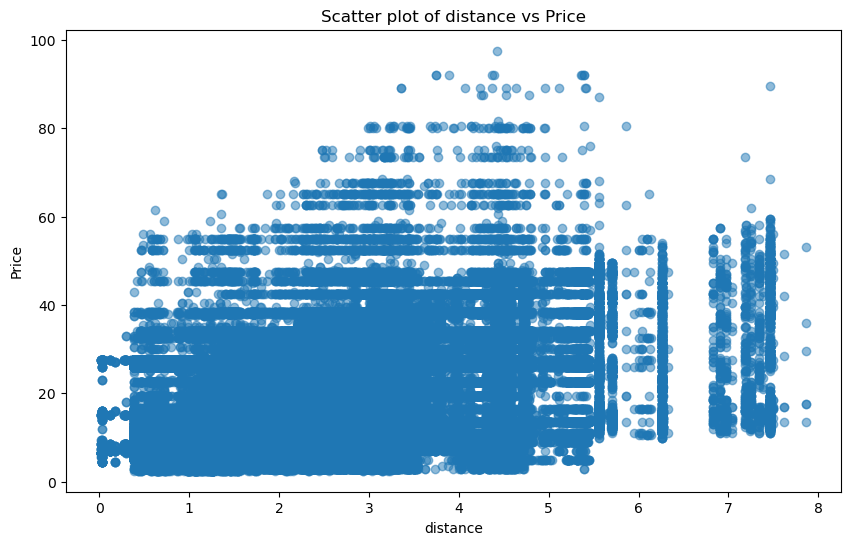

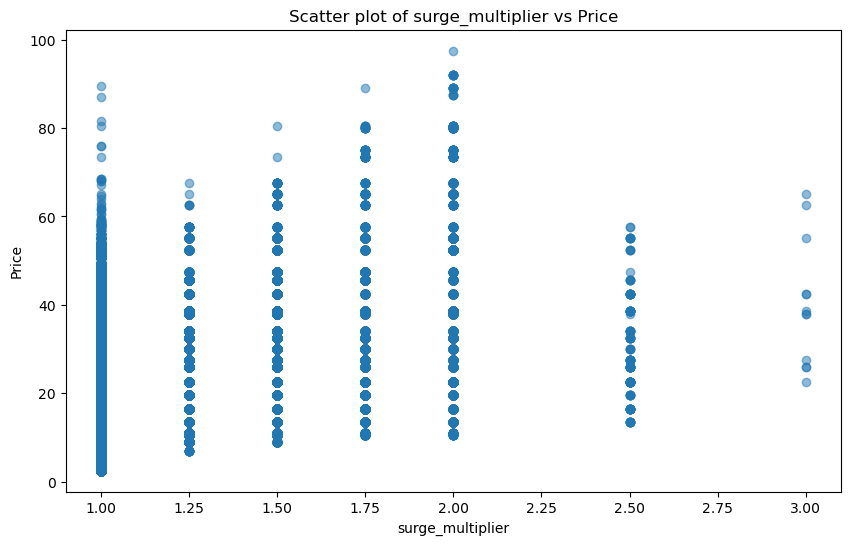

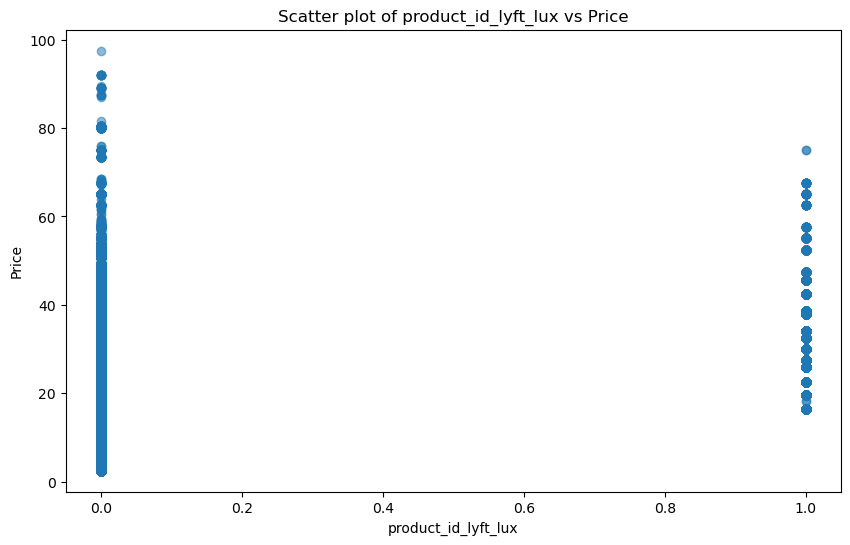

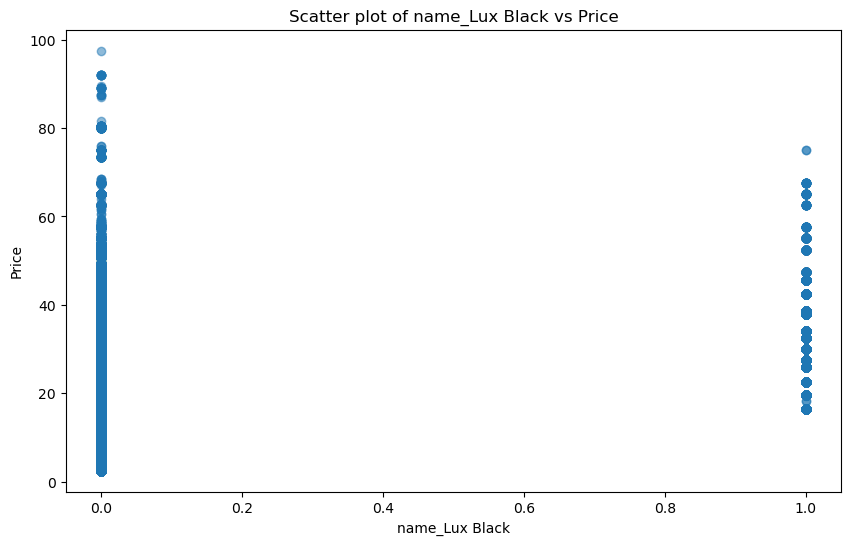

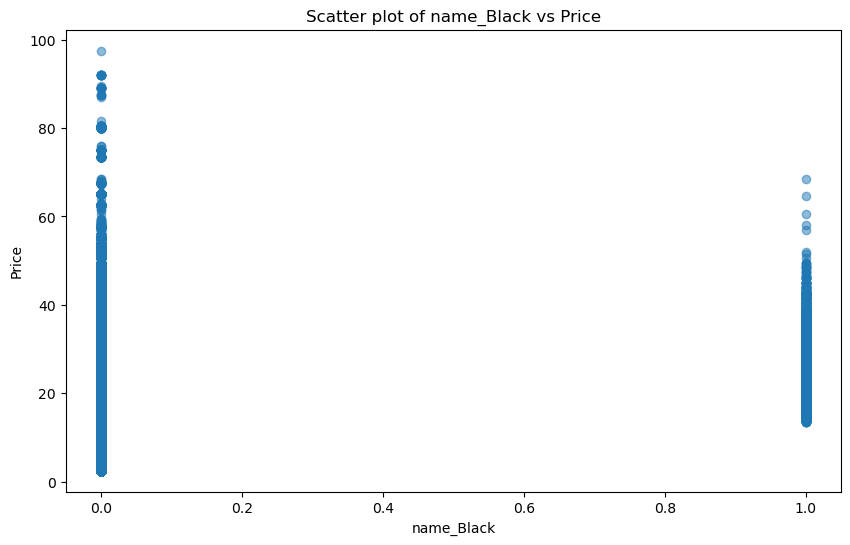

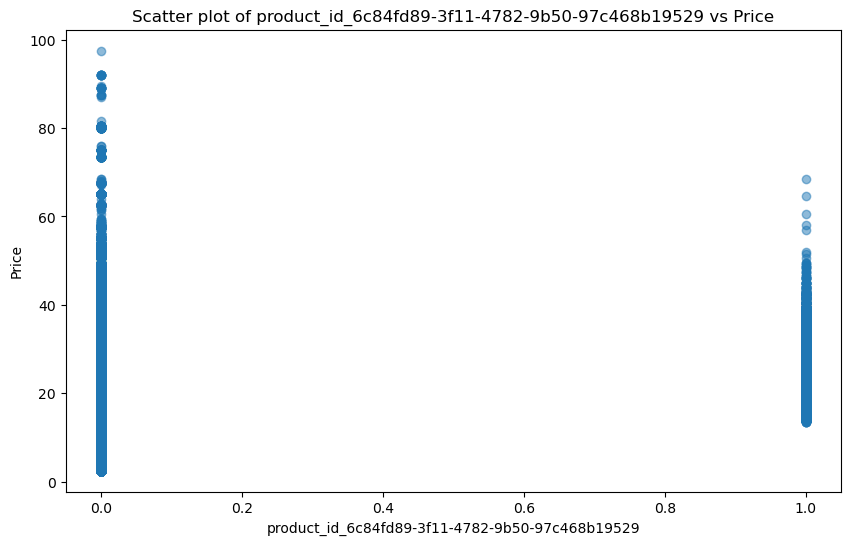

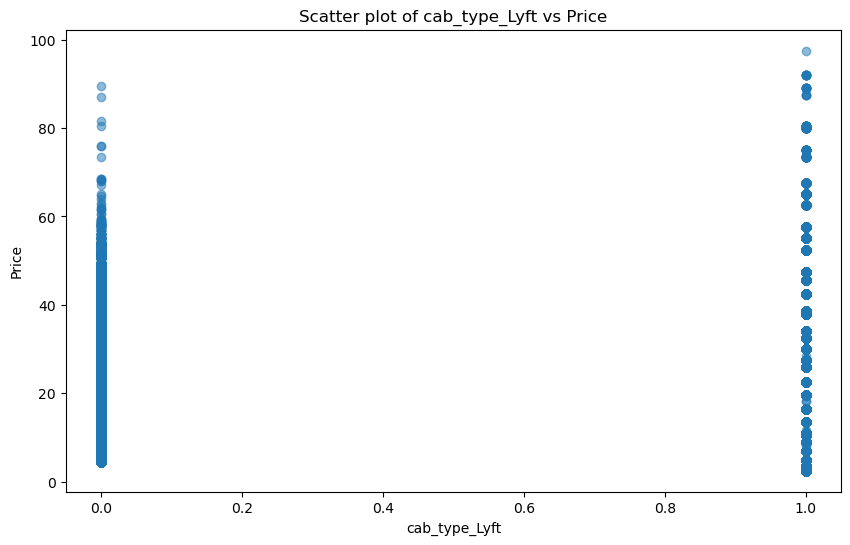

In [22]:
attributes = [
    'price',
    'product_id_lyft_luxsuv',
    'name_Lux Black XL',
    'name_Black SUV',
    'product_id_6d318bcc-22a3-4af6-bddd-b409bfce1546',
    'distance',
    'surge_multiplier',
    'product_id_lyft_lux',
    'name_Lux Black',
    'name_Black',
    'product_id_6c84fd89-3f11-4782-9b50-97c468b19529',
    'cab_type_Lyft'
]

for attribute in attributes[1:]:
    plt.figure(figsize=(10, 6))
    plt.scatter(df_no_weather_processed[attribute], df_no_weather_processed['price'], alpha=0.5)
    plt.title(f'Scatter plot of {attribute} vs Price')
    plt.xlabel(attribute)
    plt.ylabel('Price')
    plt.show()

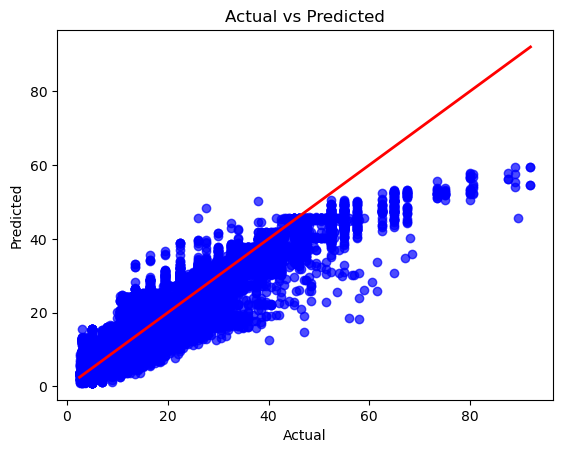

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# create arrays
X  = df_no_weather_processed.drop(columns=["price"]) # all but column of interest
y = df_no_weather_processed["price"] # column of interest

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create model
reg = LinearRegression()

# Fit to data
reg.fit(X_train, y_train)

# Make predictions
y_pred = reg.predict(X_test)

# Quick check
# print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))

# Visualize
plt.scatter(y_test, y_pred, color="blue", alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

In [26]:
# Create a DataFrame to compare the actual and predicted values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Display the first few rows of the DataFrame
print(comparison_df.head())

        Actual  Predicted
526491     7.0  12.588867
506474    10.5  11.444824
139551     7.0   6.073242
235222    15.5  17.277344
140436    16.5  19.887207


In [25]:
# Import performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")


Mean Absolute Error (MAE): 1.7480626158855734
Mean Squared Error (MSE): 6.201776507124801
R² Score: 0.9289094286525145
